# Python Implementation of f(K) function
**by Von Han T. Yu | As described in "Selection of K in K-means clustering" by Pham, Dimov, and Nguyen from 2004**

**Source: http://www.ee.columbia.edu/~dpwe/papers/PhamDN05-kmeans.pdf**

This notebook shows a Python implementation of the f(K) function of Pham, Dimov, and Nguyen from 2004. The value of f(K) is the ratio of the real distortion to the estimated distortion and is close to 1 when the data distribution is uniform. Equation of the function as follows:

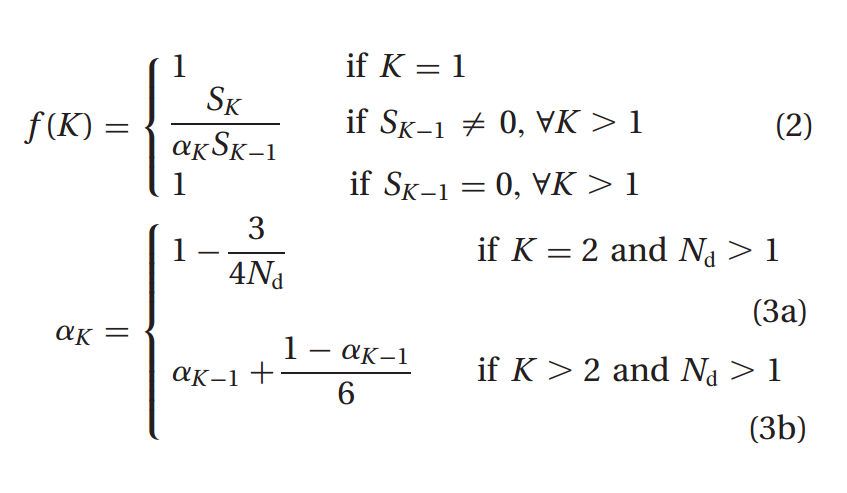

In [5]:
from IPython.display import Image
Image(filename="images/pham_dimov.png")

***As stated on their paper...***

>Where Sk is the sum of the cluster distortions when the number of clusters is K, Nd is the number of data set attributes (i.e. the number of dimensions) and aK is a weight factor. The term aK Sk-1 in equation (2) is an estimate of SK based on Sk-1 made with the assumption that the data have a uniform distribution

In [7]:
### Initialization

# Pertinent modules for this proof
from sklearn.cluster import KMeans, MiniBatchKMeans
from numpy.random import random_sample
from math import sqrt, log
import matplotlib.pyplot as plt

import pandas as pd
from pandas import DataFrame
from numpy import random, array
from sklearn.datasets.samples_generator import make_blobs

## Function Definition

In [11]:
# Pham et al Metric Function Definition

%matplotlib inline

# Define a function that would compute for the F(k)
def pham_k(x, max_k = 10):
    
    rng = range(1, max_k + 1)
    
    sks = pd.Series(index = rng)
    As = pd.Series(index = rng)
    fks = pd.Series(index = rng)
    
    nd = x.shape[1]
    
    print("Number of dimensions detected: %s\n" % nd)
    
    pham_output = DataFrame()
    
    for k in rng:
        model = KMeans(n_clusters = k)
        model = model.fit(x)
        
        # Compute for the Sk
        sk = model.inertia_
        sks[k] = sk
        
        # Compute for the alpha
        if (k == 2) & (nd > 1):
            a = 1 - (3 / (4 * float(nd)))
        elif (k > 2) & (nd > 1):
            a = As[k-1] + ((1-As[k-1])/6)
        else:
            a = None
            
        As[k] = a
        
        # Compute f(k)
        if k == 1:
            fk = 1.0
        elif (sks[k-1] != 0):
            fk = sk / (a * sks[k-1])
        elif (sks[k-1] == 0):
            fk = 1.0
        fks[k] = fk
        
        print("CENTROID %s || sk: %s\tfk: %s\ta: %s" % (k, sk, fk, a))
        
        output = DataFrame({"K":[k],"Sk":[sk], "F(k)":[fk], "ALPHA":[a]})
        
        pham_output = pd.concat([pham_output, output], axis = 0)
    
    
    return pham_output

## Interactive

(Output below is from a randomly-generated dataset containig 7M records, 35 dimensions/features, and a centroid of 3 with a standard dev of 5.6 | this code block ran for 1.5 hours)

This code block is an interactive simulation of a distribution with centroids and all its description indicated by the user. This is then run through a series of kmeans test up to the maximum K also indicated by the user.

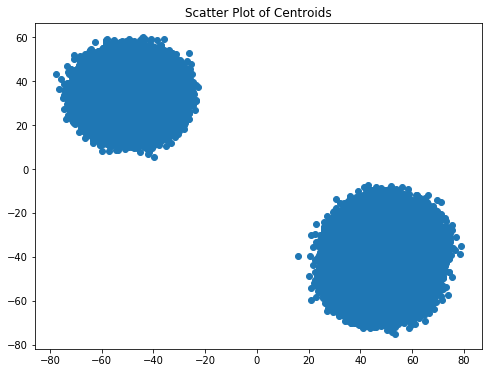

Number of dimensions detected: 35

CENTROID 1 || sk: 173297737628.65985	fk: 1.0	a: None
CENTROID 2 || sk: 82933836500.29839	fk: 0.4890421945052433	a: 0.9785714285714285
CENTROID 3 || sk: 7684207038.88004	fk: 0.09433929773771235	a: 0.9821428571428571
CENTROID 4 || sk: 7637580002.615348	fk: 1.0089461752553832	a: 0.9851190476190476


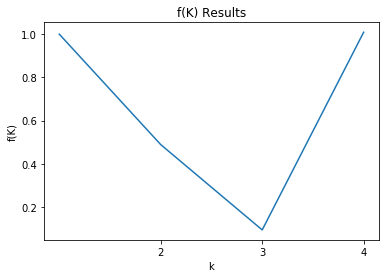

In [17]:
# Generate a blob and assign it to 'X' while its centroid labels are assigned to 'y'
X, y = make_blobs(
    n_samples=int(input("Number of samples: ")),
    centers=int(input("Number of centroids: ")),
    n_features=int(input("Dimensions: ")),
    center_box=(-50.0, 50.0),
    cluster_std=float(input("Standard Deviation: ")),
)

# Create scatter plot showing the centroid - only good for 2D datasets
plt.figure(figsize=(8, 6))
plt.scatter(X[:,0], X[:,1])
plt.title("Scatter Plot of Centroids")
plt.show()

pham_result = pham_k(X, max_k= int(input("Number of K's to test: ")))

# Show the plot of F(x) output of Pham et al metric
plt.plot(pham_result["K"], pham_result["F(k)"])
plt.xticks(range(2, len(pham_result["F(k)"])+1))
plt.title("f(K) Results")
plt.xlabel("k")
plt.ylabel("f(K)")
plt.show()

## Series of Test
This function generates results out of varying centroids and distributions.

In [18]:
def make_test(sample, centroids, dimensions, std, max_k):
    # Generate a blob and assign it to 'X' while its centroid labels are assigned to 'y'
    X, y = make_blobs(
        n_samples=sample,
        centers=centroids,
        n_features=dimensions,
        center_box=(-50.0, 50.0),
        cluster_std=std,
    )

    # Create scatter plot showing the centroid - only good for 2D datasets
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:,0], X[:,1])
    plt.title("Scatter Plot of Centroids")
    plt.show()

    pham_result = pham_k(X, max_k= max_k)

    # Show the plot of F(x) output of Pham et al metric
    plt.plot(pham_result["K"], pham_result["F(k)"])
    plt.xticks(range(2, len(pham_result["F(k)"])+1))
    plt.title("f(K) Results")
    plt.xlabel("k")
    plt.ylabel("f(K)")
    plt.show()

### Tests for semi-uniform distributions (10K Samples)
2D with semi-uniform distribution and 2 Centroids

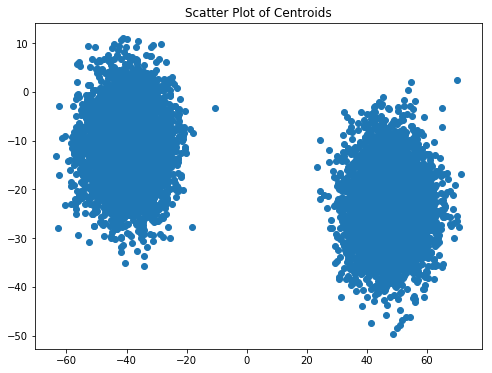

Number of dimensions detected: 2

CENTROID 1 || sk: 20231191.051187254	fk: 1.0	a: None
CENTROID 2 || sk: 962906.2381866788	fk: 0.07615221354000679	a: 0.625
CENTROID 3 || sk: 807378.1816681974	fk: 1.2196081172515738	a: 0.6875
CENTROID 4 || sk: 651039.6572504492	fk: 1.0902932394889364	a: 0.7395833333333334
CENTROID 5 || sk: 545578.3356700821	fk: 1.0702755747352637	a: 0.7829861111111112
CENTROID 6 || sk: 443767.2256549489	fk: 0.9929604990185197	a: 0.8191550925925927
CENTROID 7 || sk: 394222.75748947874	fk: 1.0459897630295527	a: 0.8492959104938272
CENTROID 8 || sk: 346413.6501188304	fk: 1.0049317579615253	a: 0.8744132587448561
CENTROID 9 || sk: 318593.7140921125	fk: 1.0271930993145164	a: 0.8953443822873801
CENTROID 10 || sk: 291394.8666958662	fk: 1.0020173808783421	a: 0.9127869852394834


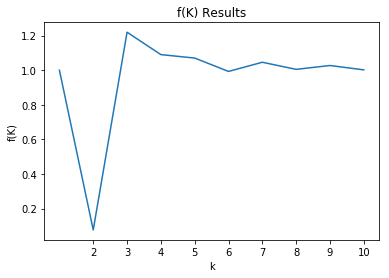

In [19]:
make_test(10000, 2, 2, 7, 10)

### 2D with semi-uniform distribution and 4 Centroids (10K Samples)
As seen, the simulation produced a tightly-knit distribution, which results to overlapping of points amongst the centroids. Hence, results favor more on 2-3 optimal centroids.

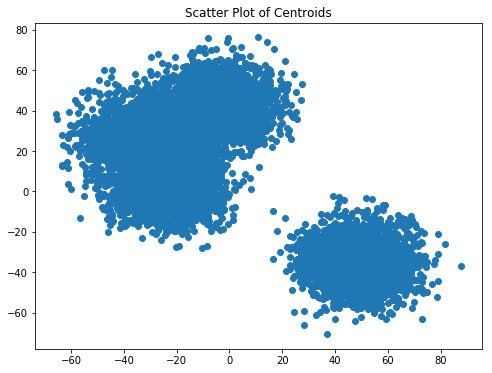

Number of dimensions detected: 2

CENTROID 1 || sk: 20665235.748747002	fk: 1.0	a: None
CENTROID 2 || sk: 5127495.915066304	fk: 0.39699491280197563	a: 0.625
CENTROID 3 || sk: 2662380.8043695344	fk: 0.755252458785177	a: 0.6875
CENTROID 4 || sk: 1798320.0299842216	fk: 0.9132920820932222	a: 0.7395833333333334
CENTROID 5 || sk: 1602667.3764503945	fk: 1.138209894452298	a: 0.7829861111111112
CENTROID 6 || sk: 1438010.87900506	fk: 1.0953493111494965	a: 0.8191550925925927
CENTROID 7 || sk: 1275016.5649868539	fk: 1.043985874699022	a: 0.8492959104938272
CENTROID 8 || sk: 1128145.5887770099	fk: 1.0118883322245458	a: 0.8744132587448561
CENTROID 9 || sk: 1021386.617779549	fk: 1.0111949704263934	a: 0.8953443822873801
CENTROID 10 || sk: 917419.645695981	fk: 0.9840302139017458	a: 0.9127869852394834


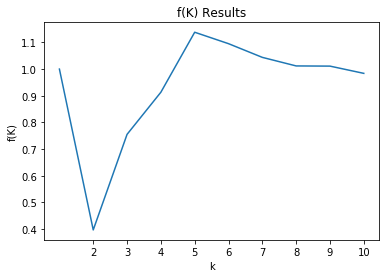

In [20]:
make_test(10000, 4, 2, 10, 10)

### Tests for disjointed distributions (10K Samples)
2D with semi-disjointed distribution and 12 Centroids

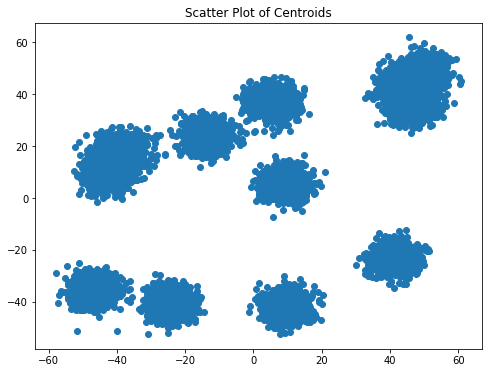

Number of dimensions detected: 2

CENTROID 1 || sk: 22760096.456489567	fk: 1.0	a: None
CENTROID 2 || sk: 10995822.63128018	fk: 0.7729895276885754	a: 0.625
CENTROID 3 || sk: 6656234.872770664	fk: 0.8804976674535825	a: 0.6875
CENTROID 4 || sk: 3543321.195564476	fk: 0.7197717020865252	a: 0.7395833333333334
CENTROID 5 || sk: 1813019.8292186325	fk: 0.6534885363435622	a: 0.7829861111111112
CENTROID 6 || sk: 1254641.6098994985	fk: 0.8447943431432082	a: 0.8191550925925927
CENTROID 7 || sk: 805200.0600748672	fk: 0.7556576424676262	a: 0.8492959104938272
CENTROID 8 || sk: 576086.7160318521	fk: 0.818214794932048	a: 0.8744132587448561
CENTROID 9 || sk: 361402.95252633636	fk: 0.700670321379756	a: 0.8953443822873801
CENTROID 10 || sk: 292066.1171818024	fk: 0.8853602949589612	a: 0.9127869852394834
CENTROID 11 || sk: 253102.6469961934	fk: 0.9345116470127041	a: 0.9273224876995695
CENTROID 12 || sk: 230409.44127824574	fk: 0.9690287435699352	a: 0.939435406416308
CENTROID 13 || sk: 221411.38346561068	fk: 1

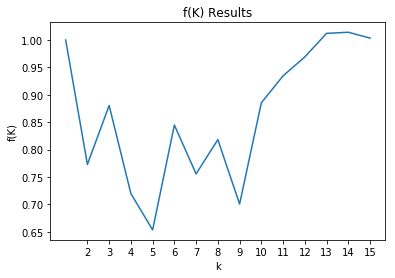

In [21]:
make_test(10000, 12, 2, 3.5, 15)

### 2D with disjointed distribution and 25 Centroids (10K Samples)
Just for kicks...

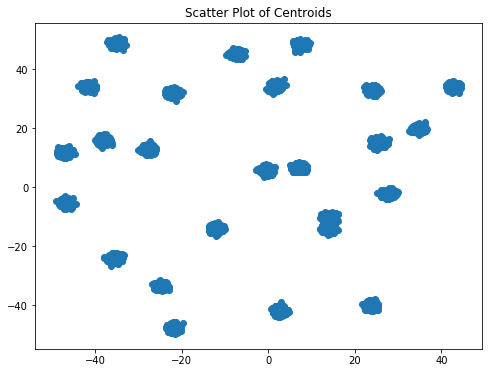

Number of dimensions detected: 2

CENTROID 1 || sk: 15368256.467132835	fk: 1.0	a: None
CENTROID 2 || sk: 9643636.01464418	fk: 1.0040057345756501	a: 0.625
CENTROID 3 || sk: 5009212.299269906	fk: 0.7555373273827426	a: 0.6875
CENTROID 4 || sk: 3586405.237083425	fk: 0.9680611826418517	a: 0.7395833333333334
CENTROID 5 || sk: 2721576.7105040876	fk: 0.9691860653834421	a: 0.7829861111111112
CENTROID 6 || sk: 1961300.9915785652	fk: 0.8797464691374323	a: 0.8191550925925927
CENTROID 7 || sk: 1403140.1513244514	fk: 0.8423600690159705	a: 0.8492959104938272
CENTROID 8 || sk: 1158248.1418360749	fk: 0.9440257174483452	a: 0.8744132587448561
CENTROID 9 || sk: 1030274.189946292	fk: 0.9934844981915928	a: 0.8953443822873801
CENTROID 10 || sk: 874912.9787827183	fk: 0.9303419405162192	a: 0.9127869852394834
CENTROID 11 || sk: 734668.049307507	fk: 0.905514694038569	a: 0.9273224876995695
CENTROID 12 || sk: 637751.0200223434	fk: 0.9240449221003275	a: 0.939435406416308
CENTROID 13 || sk: 542921.9466778067	fk: 0.8

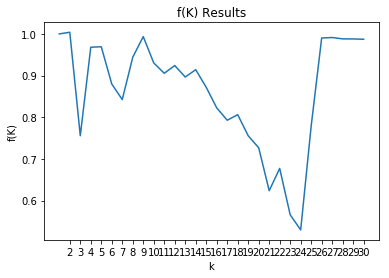

In [22]:
make_test(10000, 25, 2, 0.7, 30)